<a href="https://colab.research.google.com/github/vilkaste/compling_course33/blob/main/convnet_hw_%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


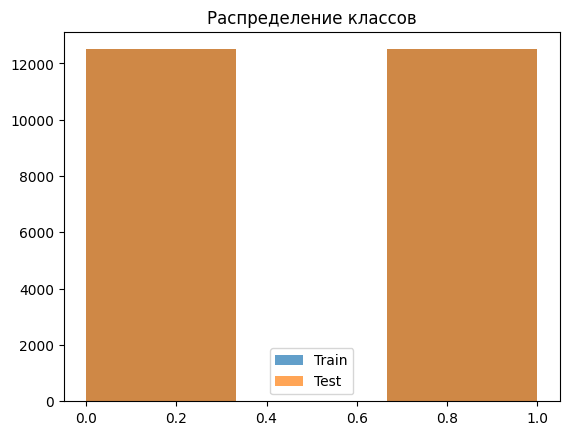

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###

# Используйте tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
(train, test), info = tfds.load('imdb_reviews', split=['train', 'test'], with_info=True, as_supervised=True)

# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)

x_train, y_train = next(iter(tfds.as_numpy(train.batch(len(train)))))
x_test, y_test = next(iter(tfds.as_numpy(test.batch(len(test)))))

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [9]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
### ВАШ КОД ЗДЕСЬ ###
vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=200)
# 4. Адаптируйте векторзатор на тренировочных текстах
### ВАШ КОД ЗДЕСЬ ###
vectorizer.adapt(x_train)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [10]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
model = keras.Sequential([
    keras.layers.Embedding(10000, 128),
    keras.layers.Conv1D(64, 5, activation='relu',),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, 200))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - Precision: 0.6679 - Recall: 0.7299 - accuracy: 0.6859 - loss: 0.5576 - val_Precision: 0.8553 - val_Recall: 0.8759 - val_accuracy: 0.8622 - val_loss: 0.3226
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - Precision: 0.9281 - Recall: 0.9331 - accuracy: 0.9299 - loss: 0.1941 - val_Precision: 0.8693 - val_Recall: 0.8700 - val_accuracy: 0.8680 - val_loss: 0.3123
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - Precision: 0.9856 - Recall: 0.9889 - accuracy: 0.9871 - loss: 0.0521 - val_Precision: 0.8937 - val_Recall: 0.8341 - val_accuracy: 0.8658 - val_loss: 0.3882
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - Precision: 0.9993 - Recall: 0.9996 - accuracy: 0.9994 - loss: 0.0067 - val_Precision: 0.8662 - val_Recall: 0.8846 - val_accuracy: 0.8724 - val_loss: 0.4367
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0010 - val_Precision: 0.9003 - val_Re

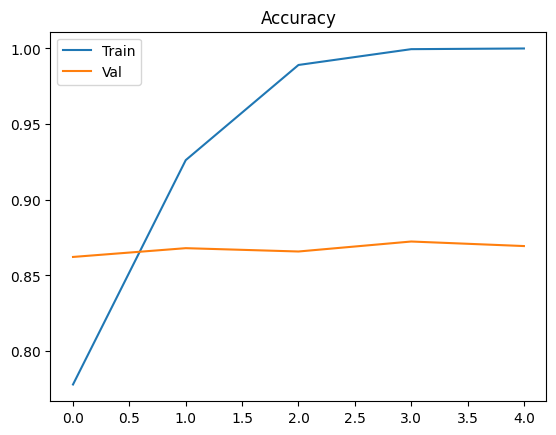

In [11]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
### ВАШ КОД ЗДЕСЬ ###
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
### ВАШ КОД ЗДЕСЬ ###
history = model.fit(x_train_vec, y_train,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=32)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [12]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
test_loss, test_acc, test_prec, test_rec = model.evaluate(x_test_vec, y_test, verbose=0)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    ### ВАШ КОД ЗДЕСЬ ###
    text_vec = vectorizer([text]).numpy()
    pred_prob = model.predict(text_vec)
    pred_label = "POS" if pred_prob > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

Тестовая accuracy: 0.8554
Тестовая precision: 0.8923
Тестовая recall: 0.8085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
b'There are films that make careers. For George Rome'... | True: POS | Pred: POS (0.97)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
b'A blackly comic tale of a down-trodden priest, Naz'... | True: POS | Pred: NEG (0.17)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
b'Scary Movie 1-4, Epic Movie, Date Movie, Meet the '... | True: NEG | Pred: NEG (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
b'Poor Shirley MacLaine tries hard to lend some grav'... | True: NEG | Pred: NEG (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
b'As a former Erasmus student I enjoyed this film ve'... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
b'My God, Ryan Gosling has made a lot of deep charac'... | True: POS | Pred: POS (0.98)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
b'This film just won the best film award at the Clev'... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
b'

## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  0.8554 - примерно 85,5%
2.  Переобучение есть - модель запомнила тренировочный вариант к 3 кругу, а на валидационном варианте она практически не изменяется в течении времени.
3. последний отзыв классифицируется неверно, как мне кажется на это есть несколько причин. во-первых, по объему отзыв достаточно большой, и помимо этого в нем много эмоционально окрашенных слов критики, которые модель считала как негативные.